In [1]:
# Import des librairies
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns 
import nltk 

from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.decomposition import  LatentDirichletAllocation
from collections import defaultdict,Counter
from time import time

from gensim.models.word2vec import Word2Vec
import gensim.downloader
import gensim 

import pyLDAvis.gensim_models
import pickle 
import pyLDAvis

/opt/mamba/lib/python3.10/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the module's documentation for alternative uses
  from imp import reload


In [2]:
### Import des données. 
dfL=pd.read_csv('df_lemm.csv')
dfL=pd.DataFrame(dfL,columns=['Contenu'])
#dfL['Date']=pd.to_datetime(dfL['Date'])
print(dfL.dtypes)
print(dfL.shape)
print(dfL[:])

Contenu    object
dtype: object
(471716, 1)
                                                  Contenu
0       cependant milliardaire proposer autre plan dep...
1       breaking face recul armee russe ukraine gerard...
2       ukraine comment arriver resume raison conflit ...
3       ministre rajouter guerre gens dangereux poutin...
4       kalustd guillaume bigot cnews jchribuisson lor...
...                                                   ...
471711  ukraine conseil securite reunion sous tension ...
471712  provence ukraine moscou washington echarpent c...
471713  epochopinion force gouvernemental ukrainien il...
471714  mal sortir role maire pari facepalm ukraine co...
471715  laumi vpecresse autre cote macron cherche ukra...

[471716 rows x 1 columns]


In [3]:
### Création du corpus et calcul de la taille du vocabulaire 
corpusL=dfL['Contenu']
words=' '.join(corpusL)
words_list=words.split()
vocab=list(set(words_list))
print (f"la taille du corpus est de {len(vocab)}")

la taille du corpus est de 544278


In [4]:
### Mise en place de la liste des bigrams
xL=list(nltk.bigrams(corpusL[0].split()))
counter=Counter(xL)
df_plotL=pd.DataFrame(counter.most_common(20))

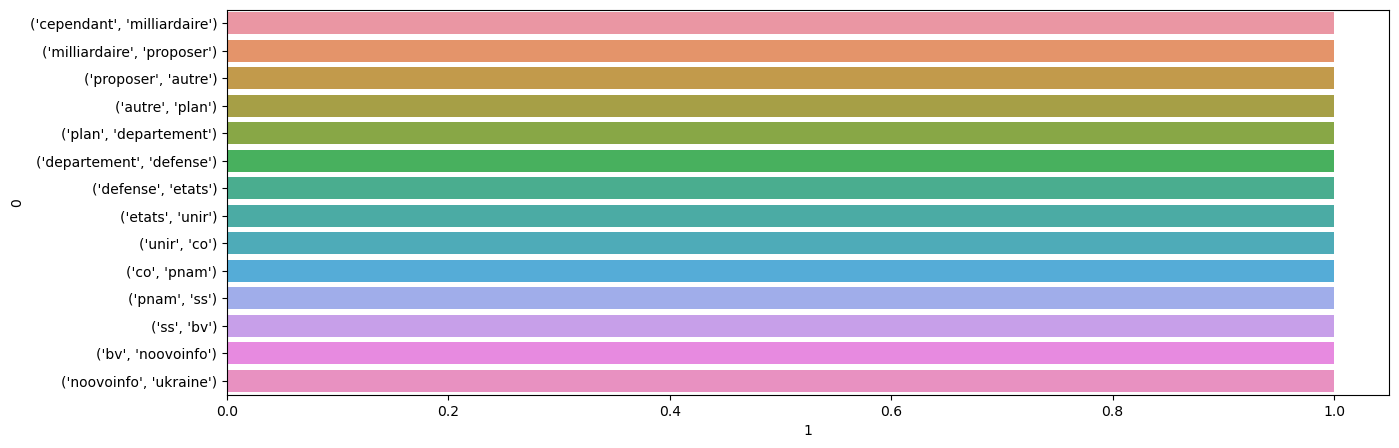

In [5]:
### Visualisation des 20 bigrams les plus fréquents dans notre corpus.
plt.figure(figsize=(15,5))
plot=sns.barplot(x=df_plotL[1],
                 y=df_plotL[0])

In [6]:
### Recherche des mots par fréquence 

In [7]:
wordsL=' '.join(corpusL)
words_listL=wordsL.split()

In [8]:
freqL=defaultdict(int)

for mot in words_listL:
    freqL[mot] +=1

In [9]:
least=[ k for k in freqL.keys()if freqL[k]>10000] 
print (f" Voici la liste des mots avec une occurence > à 10000 : \n {least}")

 Voici la liste des mots avec une occurence > à 10000 : 
 ['autre', 'co', 'ukraine', 'armee', 'russe', 'poutine', 'russie', 'conflit', 'otan', 'ue', 'user', 'guerre', 'jour', '<annee>', 'sanction', 'depuis', 'via', 'e', 'tout', 'france', 'militaire', 'ukrainien', 'situation', 'contre', 'civil', 'selon', 'arme', 'comme', 'bien', '<<', 'celui', '>>', 'pays', 'ukrainewar', 'ukrainerussiawar', 'si', 'aussi', 'aller', 'soldat', 'europe', 'avoir', 'plus', 'pouvoir', 'guerreenukraine', 'etre', 'president', 'macron', 'zelensky', 'aide', 'alors', 'heure', 'voir', 'dire', 'mettre', 'grand', 'nouveau', 'nucleaire', 'russia', 'apres', 'ville', 'force', 'non', 'encore', 'vouloir', 'soutien', 'son', 'ca', 'peuple', 'ukrainerussie', 'monde', 'ce', 'francais', 'paix', 'invasion', 'falloir', 'faire', 'personne', 'kiev', 'an', 'sans', 'entre', 'prendre', 'quand', 'tres', 'direct', 'savoir', 'donbass']


In [10]:
least=[ k for k in freqL.keys()if freqL[k]>15000] 
print (f" Voici la liste des mots avec une occurence > à 15000 : \n {least}")

 Voici la liste des mots avec une occurence > à 15000 : 
 ['co', 'ukraine', 'armee', 'russe', 'poutine', 'russie', 'conflit', 'otan', 'ue', 'guerre', 'jour', '<annee>', 'depuis', 'via', 'tout', 'france', 'militaire', 'ukrainien', 'contre', 'arme', 'comme', 'bien', '<<', '>>', 'pays', 'si', 'aller', 'europe', 'plus', 'pouvoir', 'etre', 'president', 'macron', 'zelensky', 'heure', 'voir', 'apres', 'force', 'vouloir', 'ca', 'monde', 'ce', 'invasion', 'faire', 'kiev']


In [11]:
######################################## Vectorisation 

Avant d'effectuer une modélisation, nous devons vectoriser notre corpus. Pour cela, nous avons le choix entre 2 méthodes, count Vectorizer et TF-IDF.
Nous allons choisir TF-IDF, en vectorisant ainsi, nous allons prendre en compte le poids des mots dans un document, mais aussi la fréquence d'apparition
de ces mots dans les documents du corpus. 

In [12]:
### Représentation tf-idf. 
vectorizerL1=TfidfVectorizer()
YL1=vectorizerL1.fit_transform(corpusL)
print(f"la liste des rentenues est : /: {vectorizerL1.get_feature_names_out()}")

la liste des rentenues est : /: ['aa' 'aaa' 'aaaaaaaah' ... 'état' 'œil' 'œuvre']


In [13]:
### Représentation tf-idf avec utilisation des bigrams.
vectorizerL2=TfidfVectorizer(ngram_range=(1,2))
YL2=vectorizerL2.fit_transform(corpusL)
print (f"la liste des mots retenues est : /n {vectorizerL2.get_feature_names_out()}")

la liste des mots retenues est : /n ['aa' 'aa abattu' 'aa ago' ... 'œuvre vrai' 'œuvre zombie' 'œuvre œuvre']


Bonus: WORD2VEC 

Word2Vec est une technique de vectorisation récente permettant de vectoriser des corpus, elle repose sur des réseaux de neuronnes et effectue des représentations 
vectorielles des mots composant un texte, de manières a ce que des mots qui partagent des contextes similaires, soient représentés par des vécteurs numériques proches.

Nous allons donc maintenant appliquer cette méthode de vectorisation et visualiser quelque cas d'analyse de proximité des mots composants notre corpus.

In [14]:
### Application de la méthode de vectorisation word2vec et analyse de proximité des mots
corpus_tokens = [doc.split() for doc in corpusL]
w2v_model = Word2Vec (corpus_tokens, vector_size=300, window=15, 
                     min_count=20, workers=2)

w2v_model.wv.most_similar("poutine")

[('vladimirovitch', 0.5657597780227661),
 ('kremlin', 0.5049262642860413),
 ('vladimirpoutine', 0.5013110041618347),
 ('adversaire', 0.4393550753593445),
 ('putin', 0.437629759311676),
 ('putine', 0.4324953854084015),
 ('dictateur', 0.43127328157424927),
 ('poutin', 0.4255426824092865),
 ('fedorovski', 0.4159752130508423),
 ('paranoiaque', 0.4139661192893982)]

In [15]:
w2v_model.wv.most_similar('ukraine')

[('alors', 0.38227152824401855),
 ('cependant', 0.3394485414028168),
 ('ukrainien', 0.3311021029949188),
 ('puisque', 0.3307555913925171),
 ('car', 0.32674285769462585),
 ('donc', 0.32390591502189636),
 ('neanmoins', 0.3223089277744293),
 ('encourager', 0.3212631642818451),
 ('forcer', 0.3069306015968323),
 ('chercher', 0.305924654006958)]

In [16]:
w2v_model.wv.most_similar('france')

[('bfm', 0.3856704831123352),
 ('blf', 0.38413670659065247),
 ('mondeinfo', 0.3809661865234375),
 ('cfontany', 0.3350570797920227),
 ('francaise', 0.33254697918891907),
 ('espagne', 0.312095046043396),
 ('francais', 0.307449072599411),
 ('francaises', 0.30633869767189026),
 ('clandestin', 0.28517284989356995),
 ('gerer', 0.2827592194080353)]

In [17]:
w2v_model.wv.most_similar('europe')

[('ue', 0.5641132593154907),
 ('continent', 0.5209220051765442),
 ('europeens', 0.5207730531692505),
 ('unioneuropeenne', 0.4975638687610626),
 ('economiquement', 0.4368872344493866),
 ('bloc', 0.42250683903694153),
 ('democraties', 0.4219405949115753),
 ('alliance', 0.4215601086616516),
 ('europeenne', 0.41352665424346924),
 ('affaiblir', 0.41110676527023315)]

In [18]:
w2v_model.wv.most_similar('milliardaire')

[('oligarque', 0.820090651512146),
 ('chelsea', 0.7109719514846802),
 ('abramovich', 0.7109630107879639),
 ('abramovitch', 0.7090524435043335),
 ('oligarques', 0.6916790008544922),
 ('yacht', 0.6880005598068237),
 ('proprietaire', 0.6665783524513245),
 ('fortune', 0.6488292813301086),
 ('villa', 0.6244974732398987),
 ('mega', 0.6190332174301147)]

In [19]:
w2v=w2v_model.wv['france']
w2v

array([ 1.0548606e+00,  8.1597227e-01,  1.6552699e-01,  2.3285036e+00,
       -4.8058057e-01,  2.5219822e-01,  1.5337639e+00, -6.4171922e-01,
        3.5720369e-01,  6.8330103e-01, -1.7039551e+00, -2.8199756e-01,
        3.9972150e-01, -9.5745039e-01,  3.9903559e-02, -1.8448066e+00,
        7.8206444e-01,  6.2340742e-01,  1.3581128e+00,  2.1948174e-01,
        1.0697222e+00, -1.1100711e+00, -1.9422776e-01, -1.6641828e+00,
       -7.7305144e-01,  4.6913645e-01,  1.7932924e+00, -3.0090210e-01,
       -1.6254901e+00,  5.7187295e-01,  1.7501671e+00, -8.0299461e-01,
        3.0558401e-01, -1.5804356e+00,  2.1790777e-01, -4.6252146e-01,
        1.4461918e+00,  2.4502738e+00,  1.9956063e-01,  1.2143425e+00,
       -6.0527369e-02, -1.4926939e+00, -1.0941395e+00, -6.8944186e-01,
        1.9412866e-01, -8.3408725e-01,  3.8464155e-02,  8.8732457e-01,
        3.3794302e-01,  6.3141882e-01, -1.2998015e+00,  1.6207075e-01,
        3.3777061e-01, -4.0193728e-01, -8.7597030e-01,  1.0468522e+00,
      

In [20]:
########################################### Modélisation.

Dans le cadre de ce projet, nous cherchons à effectuer du topics modelling, c'est à dire découvrir des structures thématiques caché dans de vaste archive de document,
le modèle LDA (Latent Dirichlet Allocation) est un modèle permettant d'effectuer du topic modelling, nous allons donc l'appliquer. 


In [21]:
### Préparation des bigrams pour procéder à LDA.
x=vectorizerL2.get_feature_names_out()
x=pd.DataFrame(x,columns=['col'])
x=list(x['col'])
x=[doc.split() for doc in x]

In [22]:
###Préparation du corpus pour procéder à LDA
import gensim.corpora as corpora# Create Dictionary
id2word = corpora.Dictionary(x)# Create Corpus
texts = x# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]# View
print(corpus[:1])

[[(0, 1)]]


In [23]:
### Modélisation LDA
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=9, 
                                       random_state=100,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)

In [24]:
### Visualisation 
pyLDAvis.enable_notebook()
LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
LDAvis_prepared

/opt/mamba/lib/python3.10/site-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  by='saliency', ascending=False).head(R).drop('saliency', 1)
/opt/mamba/lib/python3.10/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the module's documentation for alternative uses
  from imp import reload
/opt/mamba/lib/python3.10/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the module's documentation for alternative uses
  from imp import reload
/opt/mamba/lib/python3.10/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the module's documentation for alternative uses
  f

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.141049  0.311387       1        1  14.362700
4      0.396934  0.004663       2        1  12.041889
0     -0.133052 -0.316943       3        1  11.995431
8     -0.035710  0.003468       4        1  11.446455
5     -0.028681  0.000967       5        1  11.310810
2     -0.015217 -0.000985       6        1  10.021605
1     -0.015294 -0.000803       7        1   9.991562
7     -0.014475 -0.000916       8        1   9.645396
6     -0.013456 -0.000838       9        1   9.184152, topic_info=           Term           Freq          Total Category  logprob  loglift
19           co  364060.000000  364060.000000  Default  30.0000  30.0000
122     ukraine   98552.000000   98552.000000  Default  29.0000  29.0000
261      russie   35645.000000   35645.000000  Default  28.0000  28.0000
181       russe   30861.000000   30861.000000  Default  27.0000  27.0000
1391  ukrainien   23441.000000   23441.000000  Default  26.0000  26.0000
...         ...            ...            ...      ...      ...      ...
2036     servir    3126.901412    3128.104377   Topic9  -5.2918   2.3873
4970   violence    3019.404788    3020.607114   Topic9  -5.3267   2.3873
3849     sortir    2961.574846    2962.784134   Topic9  -5.3461   2.3873
1666      aider    2884.592950    2885.796236   Topic9  -5.3724   2.3873
753     appeler    2896.268762    2897.479475   Topic9  -5.3684   2.3873

[301 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
885       3  0.999729         aide
1666      9  0.999724        aider
1467      7  0.999854        aller
1699      5  0.999734        alors
159       5  0.999831          amp
...     ...       ...          ...
938       7  0.999909     zelensky
2097      2  0.999581  zelenskyyua
1435      2  0.999728      zemmour
2098      3  0.999709         zone
157       2  0.999891         état

[271 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 5, 1, 9, 6, 3, 2, 8, 7])

In [25]:
# Autre mise en place de l'algorithme de LDA.

In [26]:
n_samples = 2000
n_features = 1000
n_components = 5
n_top_words = 5
batch_size = 128

In [27]:
def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(1, 5, figsize=(40, 25), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 30})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()




 Fitting LDA models with tf features, n_samples=2000 and n_features=1000...
done in 1417.184s.


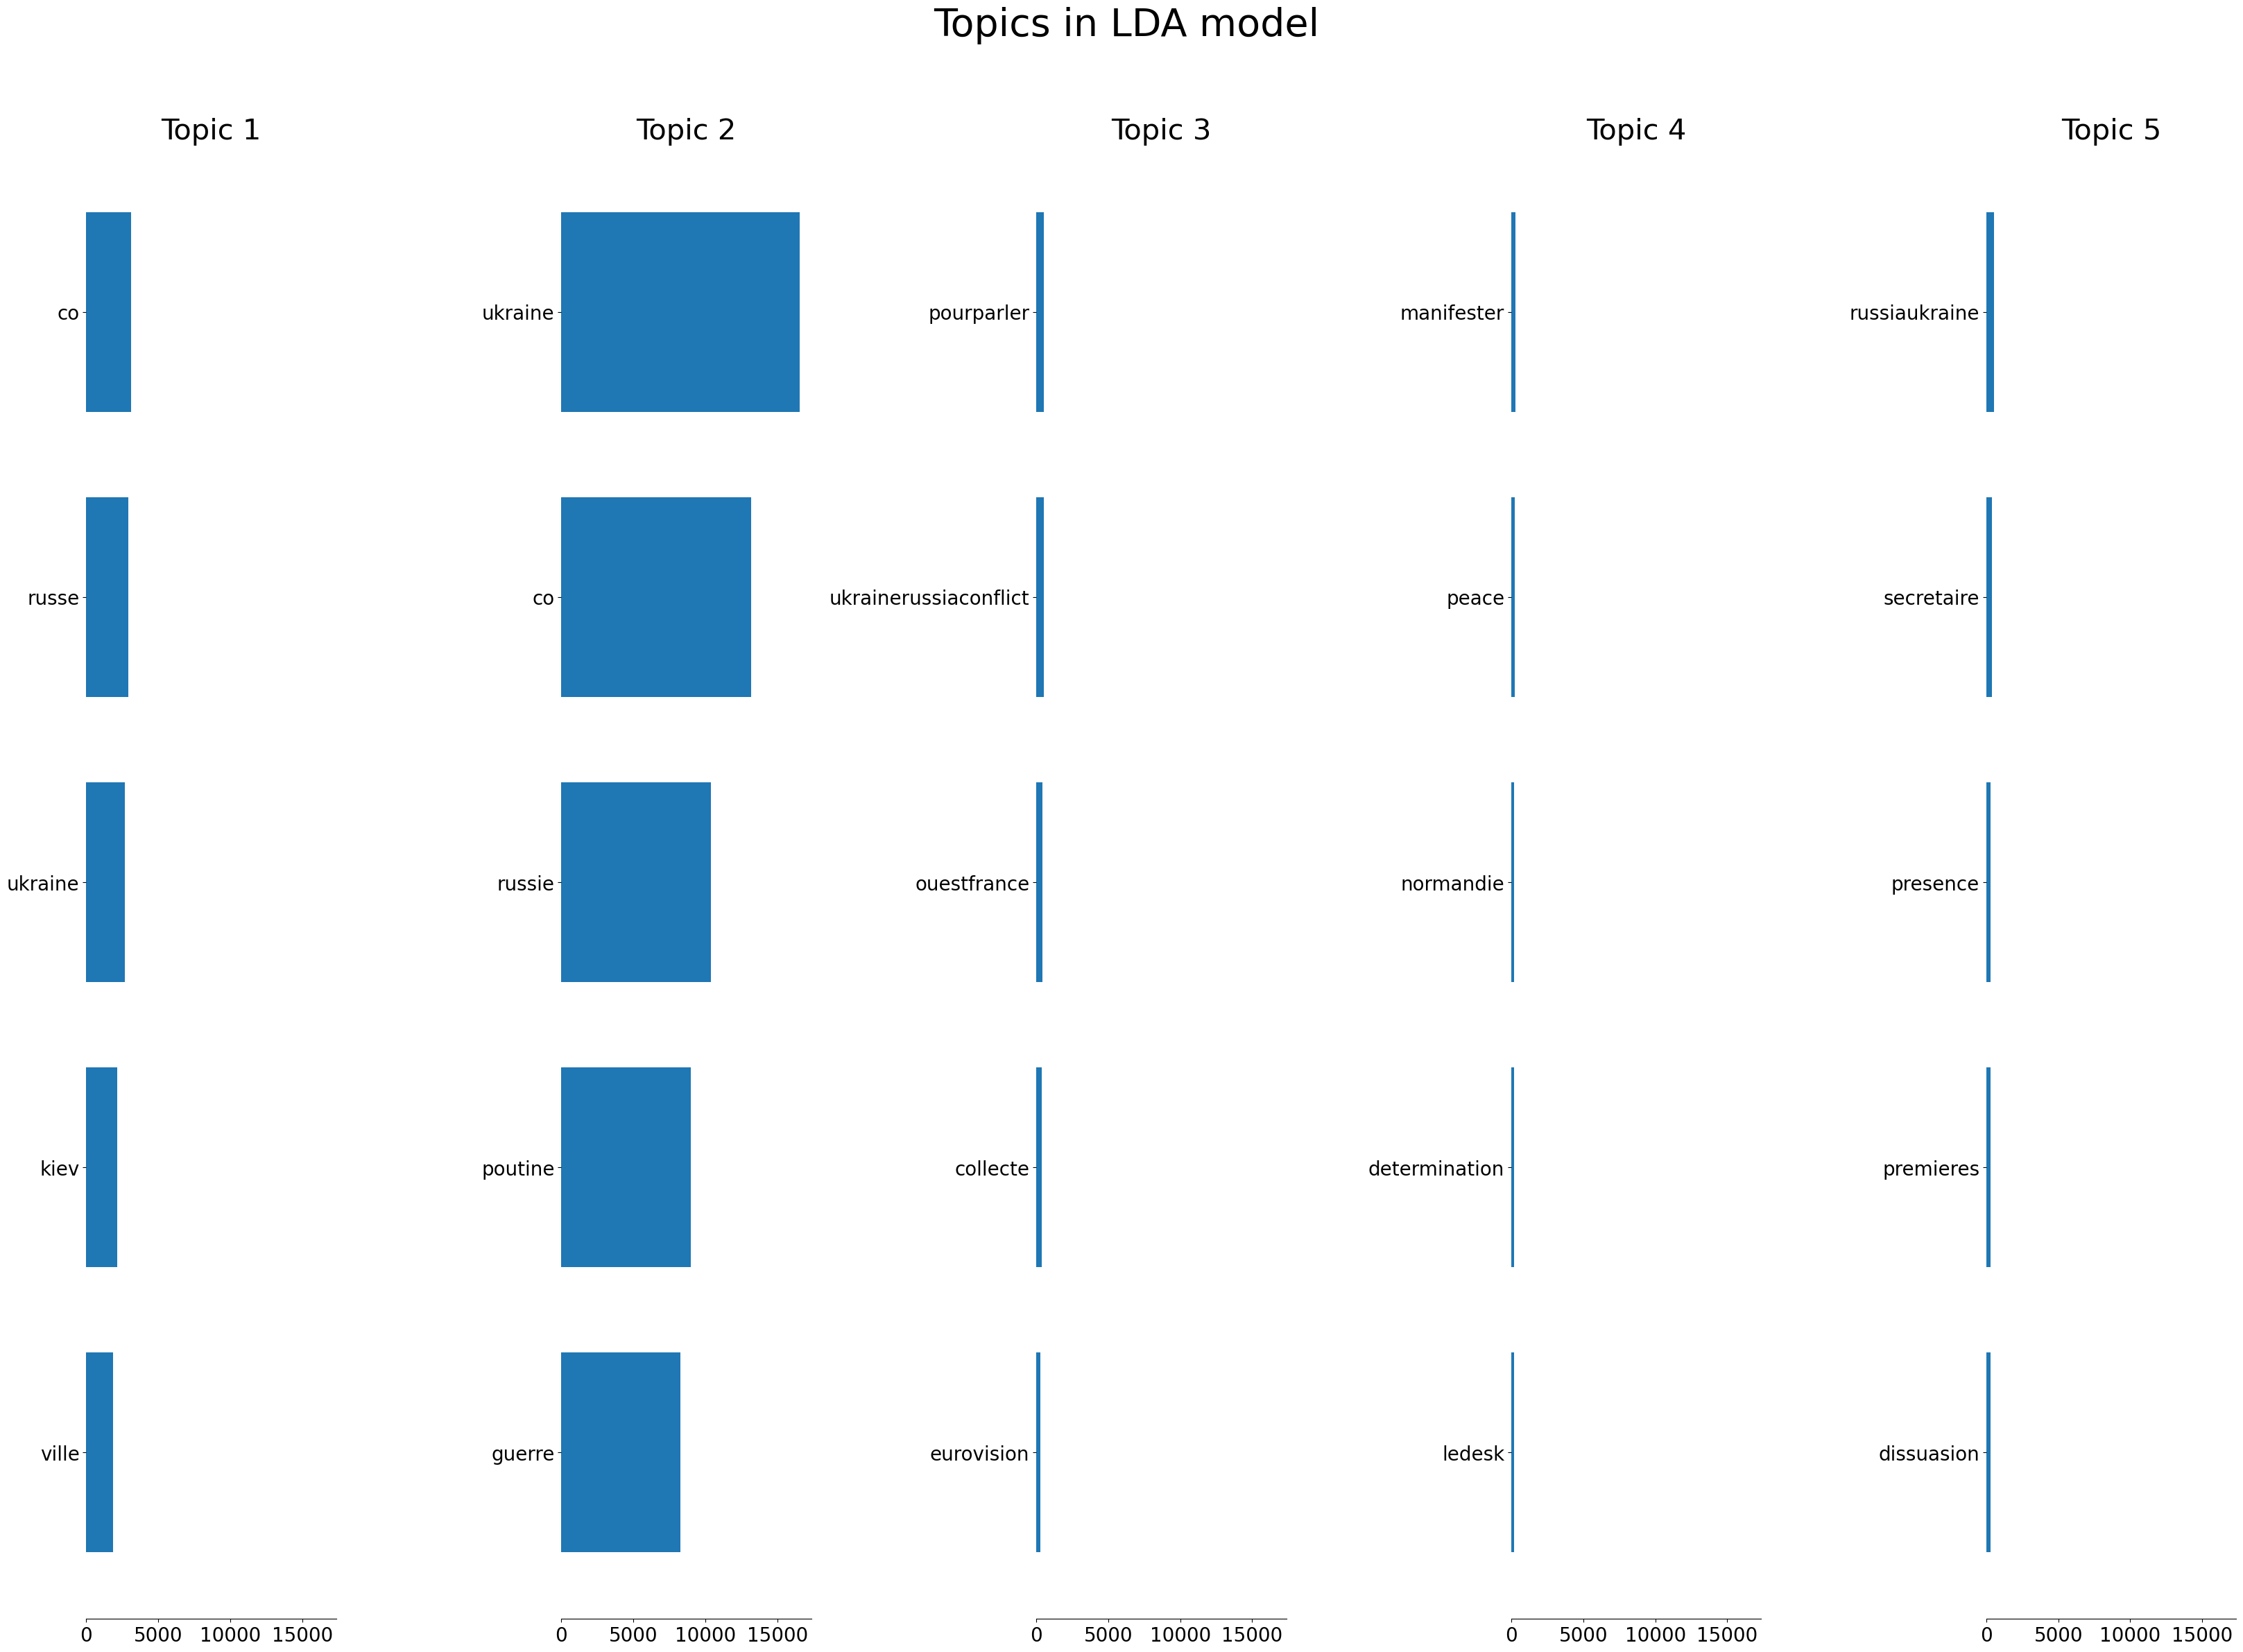

In [28]:
print(
    "\n" * 2,
    "Fitting LDA models with tf features, n_samples=%d and n_features=%d..."
    % (n_samples, n_features),
)
lda = LatentDirichletAllocation(
    n_components=n_components,
    max_iter=5,
    learning_method="online",
    learning_offset=50.0,
    random_state=0,
)
t0 = time()
lda.fit(YL1)
print("done in %0.3fs." % (time() - t0))

tf_feature_names = vectorizerL1.get_feature_names_out()
plot_top_words(lda, tf_feature_names, n_top_words, "Topics in LDA model")